# Name: Ronit Kumar Kataria  (06451)
# Email: rk06451@st.habib.edu.pk
# HomeWork title: Homework Assignment 13: NLP


In [2]:
import numpy
import re
import requests
from bs4 import BeautifulSoup
import en_core_web_sm
from collections import Counter
from spacy import displacy
import spacy
from nltk import pos_tag, word_tokenize, RegexpParser
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ronit Kataria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Ronit
[nltk_data]     Kataria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3>Question -1</h3>
Select any article on the website of your interest and perform Name Entity Relation
(NER) analysis on it. Show all the necessary output and visualization and explain
your findings. Also mention if you see any shortcoming or error in the algorithm
output.

In [3]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))


In [4]:
nlp = spacy.load('en_core_web_sm')
ny_bb = url_to_string(
    'https://blogs.lse.ac.uk/religionglobalsociety/2022/01/pakistans-dilemma-of-forced-conversions-and-marriages-put-minority-women-at-risk/')
article = nlp(ny_bb)
len(article.ents)


146

In [5]:
labels = [x.label_ for x in article.ents]
Counter(labels)


Counter({'GPE': 28,
         'ORG': 19,
         'PERSON': 24,
         'DATE': 35,
         'CARDINAL': 7,
         'TIME': 13,
         'NORP': 12,
         'ORDINAL': 4,
         'LAW': 1,
         'LOC': 1,
         'WORK_OF_ART': 1,
         'EVENT': 1})

In [6]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)


[('Pakistan', 21), ('Qamar Rafiq', 5), ('January 21, 2022', 5)]

In [7]:
sentences = [x for x in article.sents]
print(sentences[0])


 Pakistan's dilemma of forced conversions and marriages put minority women at risk | Religion and Global Society About Guidelines for Contributors Comments Policy Recent Posts Contact LSE Religion Scholars Network   About Guidelines for Contributors Podcasts and Videos Faith and Sport Empire Religion and Legacy Environment and Religion Covenantal Pluralism Religion in the US LSE Research Search Search for: Qamar Rafiq January 20th, 2022 Pakistan’s dilemma of forced conversions and marriages put minority women at risk 10 comments               | 63 shares                Estimated reading time: 4 minutes Qamar Rafiq January 20th, 2022 Pakistan’s dilemma of forced conversions and marriages put minority women at risk 10 comments               | 63 shares                Estimated reading time: 4 minutes       63       Shares In this post, Qamar Rafiq discusses religious minorities in Pakistan, seen more acutely through the ongoing issue of forced conversations and marriages.


In [8]:
displacy.render(nlp(str(sentences[0])), jupyter=True, style='ent')


In [9]:
dict([(str(x), x.label_) for x in nlp(str(sentences[0])).ents])


{'Pakistan': 'GPE',
 'Religion and Global Society About Guidelines for Contributors Comments Policy Recent Posts Contact LSE Religion Scholars Network': 'ORG',
 'Videos Faith': 'ORG',
 'Sport Empire Religion': 'ORG',
 'US': 'GPE',
 'Qamar Rafiq': 'PERSON',
 'January 20th': 'DATE',
 '2022': 'DATE',
 '10': 'CARDINAL',
 '63': 'CARDINAL',
 '4 minutes': 'TIME'}

In [10]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[0])) if not y.is_stop and y.pos_ != 'PUNCT']]

[(' ', 'SPACE', ' '),
 ('Pakistan', 'PROPN', 'Pakistan'),
 ('dilemma', 'NOUN', 'dilemma'),
 ('forced', 'VERB', 'force'),
 ('conversions', 'NOUN', 'conversion'),
 ('marriages', 'NOUN', 'marriage'),
 ('minority', 'NOUN', 'minority'),
 ('women', 'NOUN', 'woman'),
 ('risk', 'NOUN', 'risk'),
 ('|', 'NOUN', '|'),
 ('Religion', 'PROPN', 'Religion'),
 ('Global', 'PROPN', 'Global'),
 ('Society', 'PROPN', 'Society'),
 ('Guidelines', 'PROPN', 'Guidelines'),
 ('Contributors', 'PROPN', 'Contributors'),
 ('Comments', 'PROPN', 'Comments'),
 ('Policy', 'PROPN', 'Policy'),
 ('Recent', 'PROPN', 'Recent'),
 ('Posts', 'PROPN', 'Posts'),
 ('Contact', 'PROPN', 'Contact'),
 ('LSE', 'PROPN', 'LSE'),
 ('Religion', 'PROPN', 'Religion'),
 ('Scholars', 'PROPN', 'Scholars'),
 ('Network', 'PROPN', 'Network'),
 ('  ', 'SPACE', '  '),
 ('Guidelines', 'PROPN', 'Guidelines'),
 ('Contributors', 'PROPN', 'Contributors'),
 ('Podcasts', 'PROPN', 'Podcasts'),
 ('Videos', 'PROPN', 'Videos'),
 ('Faith', 'PROPN', 'Faith'),
 ('

In [11]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')


<h3>Entire Analysis for Question-1:</h3>
For the question one, I have chosen a topic which is very near to my hometown as most of the forced conversion cases are done in Interior Sindh. The analysis highlights the important dates on which forced conversion has taken place with exact location as well. The display render invades some names. It also shows the important people involved in this entire crime/service to religion. 

The analysis also finds the pattern of force conversion where a girl is abducted, kept for two days, and then a recorded video is made in which she is forced to convert to Islam. The analysis also shows the pattern of the people involved in this crime. It also highlights one of the important factor that force conversion only happens in the rural areas of Sindh and not in the urban areas. 

This is injustice to all minorities in Pakistan and the government should take strict action against this crime.


<h3>Question-2</h3>
Select any research paper of your interest and perform word frequency and keyword
extraction analysis. Use at least 3 different techniques/libraries. Show all the
necessary output and visualization and explain your findings. Compare different
techniques and mention if you see any shortcoming or error in the algorithm output.

In [12]:
import tika
tika.initVM()
from tika import parser  # pip install tika

raw = parser.from_file("ludoPaper.pdf")
# print(raw['content'])


2023-05-01 01:13:44,954 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2023-05-01 01:13:49,971 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [13]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et",
                 "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower()
                not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

filtered_word_freq = nltk.FreqDist(clean_words)


In [14]:
filtered_word_freq.most_common(20)


[('player', 101),
 ('players', 76),
 ('learning', 50),
 ('expert', 50),
 ('false', 40),
 ('Learning', 36),
 ('true', 34),
 ('TD', 31),
 ('performance', 28),
 ('random', 27),
 ('rate', 26),
 ('game', 25),
 ('episodes', 25),
 ('Ludo', 24),
 ('state', 24),
 ('wins', 23),
 ('function', 20),
 ('using', 19),
 ('RL', 19),
 ('value', 19)]

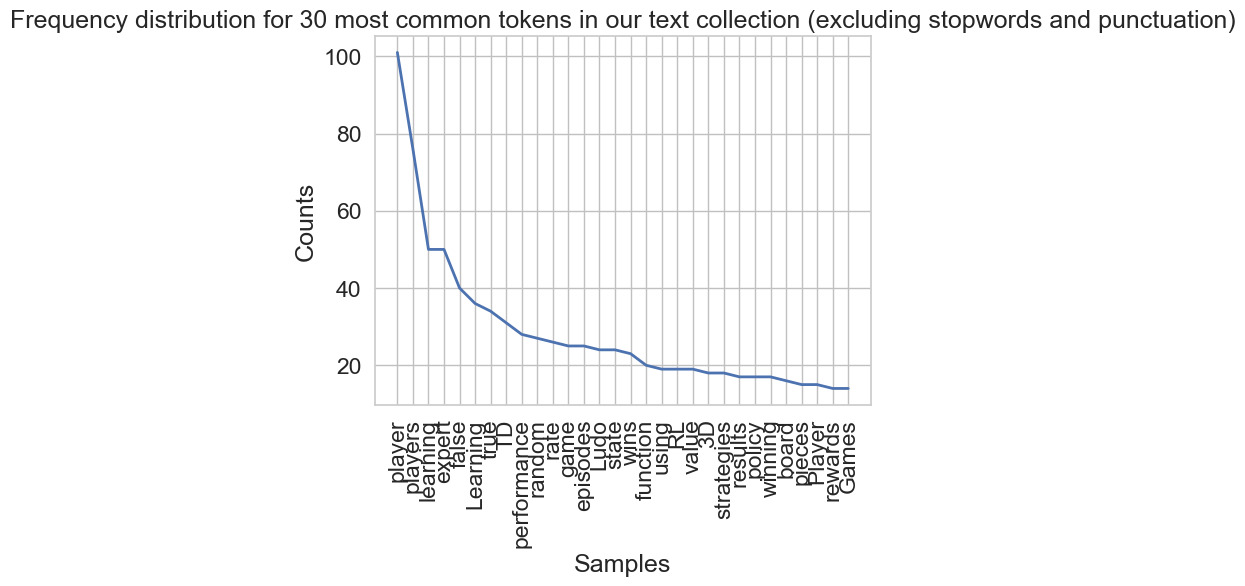

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [15]:
filtered_word_freq.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

<h3>Analysis:</h3>
The figure shows most occured words in paper with their frequency count. Player is the highest occuring word in the papeer, with ludo game and all which can be easily analyzed that this paper is written on ludo game. Other words such as episode, funcitong, state reminds that this is based on Reinforcement Learning and the author is trying to check the performance. 

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]


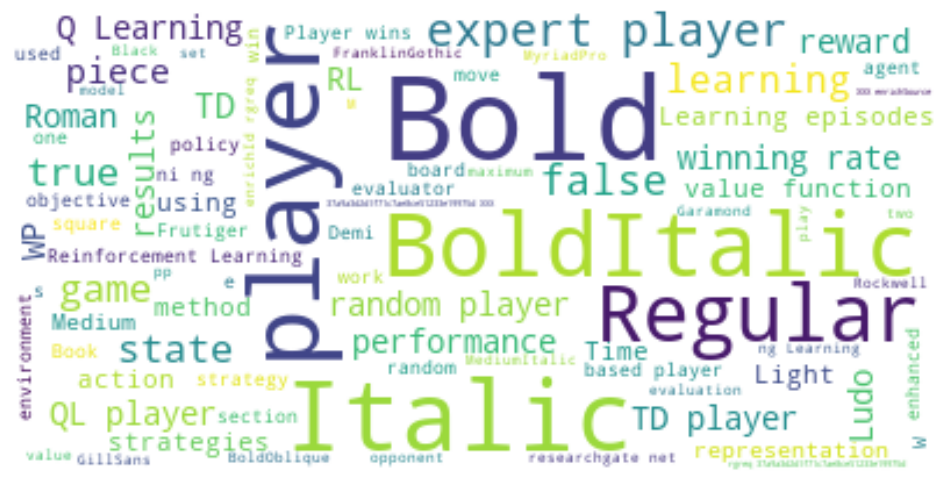

In [17]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


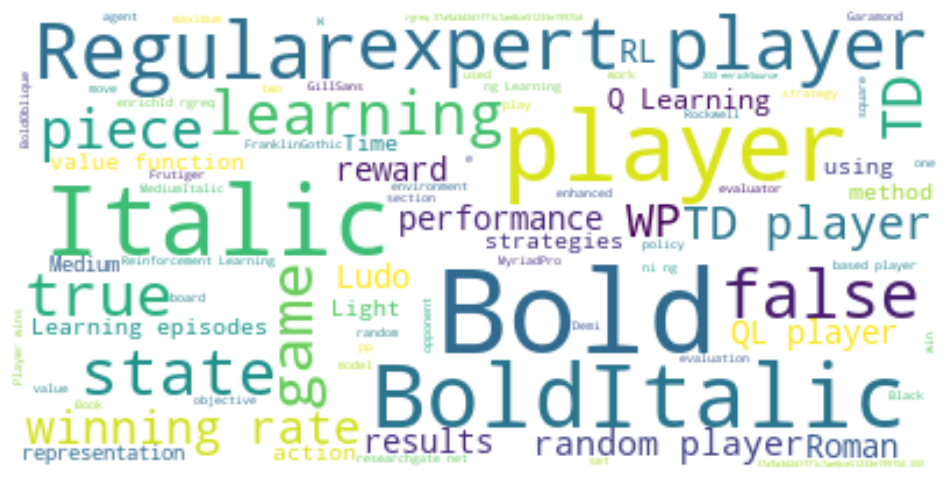

In [18]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h3>Analysis:</h3>
The second library used is Rake which is used for keyword extraction. The wordcloud shows the keywords extracted from the paper. The keywords are ludo game, reinforcement learning, player, episode, state, function, and all. The more the size of the word, the more it is important. From this, a person can easily analyze that the paper is written on ludo game and the author is trying to check the performance of the game with TD and  Q learning. 
It is the great library which can easily analyze the important keywords from paper so that person does not have to read the entire text again. 

In [19]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]


[(257.92564102564097,
  '00 © 2012 ieee 83 ronit kataria highlight ronit kataria highlight ronit kataria highlight ronit kataria highlight create'),
 (113.5,
  'documenten te maken die zijn geoptimaliseerd voor weergave op een beeldscherm'),
 (112.45119047619048,
  'paraphrase identification view project faisal alvi habib university 9 publications 81 citations see profile'),
 (98.54850746268654,
  'moataz ahmed red player start area blue player start square blue player home square fig'),
 (73.6625, 'documenten kunnen worden geopend met acrobat en adobe reader 5'),
 (56.4234680117904,
  'learning based ludo players conference paper · september 2012 doi'),
 (49.599999999999994, '85 ronit kataria highlight'),
 (39.18787878787878, 'growing popularity across video games genres since'),
 (37.144348894348894,
  'low minimum performance reflects incorrect board evaluations caused'),
 (35.769230769230774, '2500 22500 42500 62500 82500 w')]

In [20]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)


(Ludo, September 2012, 10.1109, 5, 1,889, 3, Faisal Alvi, Habib University, 9, PUBLICATIONS, 81, CITATIONS, Faisal Alvi, 16 December 2020, https://www.researchgate.net/project/Paraphrase-Identification-3?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3D&el=1_x_9&_esc=publicationCoverPdf
https://www.researchgate.net/?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3D&el=1_x_1&_esc=publicationCoverPdf
https://www.researchgate.net/profile/Faisal-Alvi?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3D&el=1_x_4&_esc=publicationCoverPdf
https://www.researchgate.net/profile/Faisal-Alvi?enrichId=rgreq-37a9a3d2d1f71c7ae8ce51233e19975d-XXX&enrichSource=Y292ZXJQYWdlOzI2MTI3OTMwNjtBUzo5NjkzNDAxMTEzMTA4NTNAMTYwODEyMDEwMDk3Ng%3D%3

In [21]:
import yake

In [22]:
kw_extractor = yake.KeywordExtractor()
language = "en"

# This defines the length of topic. like if it 3 then there are 3 words in topic
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(
    lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)


('expert player', 0.000800590849045306)
('player', 0.0008955857880815026)
('expert players Fig.', 0.0010457898246361273)
('random players', 0.0012096753225357437)
('players', 0.0012222111931465213)
('learning', 0.0012304417607970802)
('learning episodes', 0.001993127559586207)
('Reinforcement learning', 0.0020540723016325715)
('based Ludo players', 0.002108598267527307)
('Ludo player', 0.002500038866659421)
('expert Ludo player', 0.0028351052781063688)
('winning rate', 0.003282728382264114)
('expert', 0.0032993511053125207)
('Q-learning based Ludo', 0.00427686078412567)
('Ludo players Conference', 0.004438128775665974)
('expert player performance', 0.005035992564227709)
('Q-learning Ludo player', 0.005103259498807083)
('players Fig.', 0.005392854181281892)
('Ludo', 0.005471335399836933)
('proposed expert player', 0.005700094634321935)


<h3>Analysis:</h3>
The third library used is Yake which is used for keyword extraction. This is used to identify the importance of keywords in paper.  The lower the score, the more significant the keyword will be. The keywords such as expert players has score of 0.0008 whereas the keyword ludo Player has score of 0.0025. This shows that expert players is more important than ludo game.

<h3>Question 3<h3>

In [23]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob


In [24]:
# Part-1: Authorization and Search tweets
# Getting authorization
auth = tw.OAuth2BearerHandler(
    'AAAAAAAAAAAAAAAAAAAAAM6CnAEAAAAAg3jcrw7guJg1MWNZ6avdp1hP2sk%3DMLBlokDJlF6H7yNGQ5OrS5WWT0Yqb16rvADj9pvYXLhQq2gwhz')
api = tw.API(auth)


In [25]:
# Create a custom search term and define the number of tweets
search_term = " #ForcedConversions -filter:retweets"

tweets = tw.Cursor(api.search_tweets,
                   q=search_term + 'since:2023-04-05',
                   lang="en").items(100)


In [26]:
searched_tweets = [t for t in tweets]


In [27]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_ForcedConversion.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_ForcedConversion.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_ForcedConversion_Data.csv',index=False)

In [28]:
def remove_url(txt):
    # Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [29]:
# Removing @ handle
import re


def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt


In [30]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])


In [31]:
tweet_dataset['text'] = np.vectorize(
    remove_pattern)(tweet_dataset['text'], "@[\w]*")


In [32]:
tweet_dataset.to_csv('tweet_data_clean_ForcedConversion.csv',index=False)

In [33]:
tweet_dataset = pd.read_csv('tweet_data_clean_ForcedConversion.csv')


In [34]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0] >= 0:
       res = 'positive'
    else:
       res = 'negative'
    return (res)


In [35]:
tweet_dataset['sentiment'] = np.vectorize(
    tweet_sentiment)(tweet_dataset['text'])


<h3>(b) Perform Sentiment Analysis on the tweet and show total positive and negative
sentiment counts </h3>

In [36]:
tweet_dataset['sentiment'].value_counts()


positive    65
negative    23
Name: sentiment, dtype: int64

<h3> Analysis </h3>
The analysis shows that there are total of 65 Positive and 23 Negative Sentiments present in the tweets of Forced Conversion. 

<h3>(c)  Display one Positive and one Negative sentiment and discuss if the algorithm
is accurate. </h3>

In [37]:
# Postive Sentiment tweets:
tweet_dataset[tweet_dataset['sentiment'] == 'positive']['text'].head()



0    RT festivalbharat MalavikaBJPLove is beautiful...
2    RT festivalbharat MalavikaBJPLove is beautiful...
3    RT festivalbharat MalavikaBJPLove is beautiful...
4    RT festivalbharat MalavikaBJPLove is beautiful...
5    RT festivalbharat MalavikaBJPLove is beautiful...
Name: text, dtype: object

<h3> Analysis </h3>
The Tweet is classified as Positive sentiment as words such as Love, Beautiful and all are present in the tweet. So the sentimental score is greater than 0

In [38]:
tweet_dataset[tweet_dataset['sentiment'] == 'negative']['text'].head()


1     RT festivalbharat RashmiDVSEvery time Hindus s...
18    RT MTTNews Pakistan and forced conversions of ...
24    RT CittiMedia kishorij Abrahamic religions can...
25    RT widhyarthi In fundamentalist Islamic Pak ev...
27    RT MTTNews Pakistan and forced conversions of ...
Name: text, dtype: object

<h3> Analysis </h3>
These tweets are negative sentiments as these contains the words such as hate, kill, forced and all. So the sentimental score is less than 0. So the algorithm is accurate.

<h3>(d) Display the tweet with highest retweets and show its sentiment. </h3>

In [39]:
max_retweets_tweet = tweet_dataset.loc[tweet_dataset['retweet_count'].idxmax()]
max_retweets_tweet['sentiment'] = np.vectorize(
    tweet_sentiment)(max_retweets_tweet['text'])
max_retweets_tweet


C:\Users\Ronit Kataria\AppData\Local\Temp\ipykernel_7068\741073974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_retweets_tweet['sentiment'] = np.vectorize(


tweet_id                                        1652729985667416065
text              RT festivalbharat RashmiDVSEvery time Hindus s...
favorite_count                                                    0
retweet_count                                                   140
created_at                           Sun Apr 30 17:41:49 +0000 2023
sentiment                                                  negative
Name: 1, dtype: object

In [40]:
max_retweets_tweet['text']

'RT festivalbharat RashmiDVSEvery time Hindus speak out against forced conversions The Left starts crying victim amp politicises the is'

<h3> Analysis </h3>
The following tweet has the highest retweets and the sentimental score is less than 0. So the tweet is Negative. The tweet have words such as hate, kill, against, crying, victim forced and all. So the sentimental score is less than 0. So the algorithm is accurate.

<h3> (e). Make a timeline visualization plot showing counts of positive and negative
sentiments over the period of time </h3>

In [41]:
# plotting total number of positive, negative and neutral tweets over time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objs as go
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

# convert the 'Datetime' column to datetime format
tweet_dataset['created_at'] = pd.to_datetime(tweet_dataset['created_at'])

# group the data by date and sentiment, and count the number of tweets in each group
grouped_data = tweet_dataset.groupby(
    ['created_at', 'sentiment']).size().reset_index(name='count')

# pivot the table to create a separate column for each sentiment
pivot_table = pd.pivot_table(grouped_data, values='count', index=[
                             'created_at'], columns=['sentiment'], fill_value=0)

# create a timeline visualization plot
timeline_fig = go.Figure()
timeline_fig.add_trace(go.Scatter(
    x=pivot_table.index, y=pivot_table['positive'], name='positive', line=dict(color='green')))
timeline_fig.add_trace(go.Scatter(
    x=pivot_table.index, y=pivot_table['negative'], name='negative', line=dict(color='red')))
timeline_fig.update_layout(
    title='Timeline of Positive and Negative Sentiments', xaxis_title='Date', yaxis_title='Count')

# show the plot
timeline_fig.show()


<h3> Analysis </h3>
The graph above shows the timeline visualization plot showing counts of positive and negative sentiments over the period of time. The graph shows that the negative sentiments are more than the positive sentiments, which means the case is senstive and people's emotions are involved in this case.

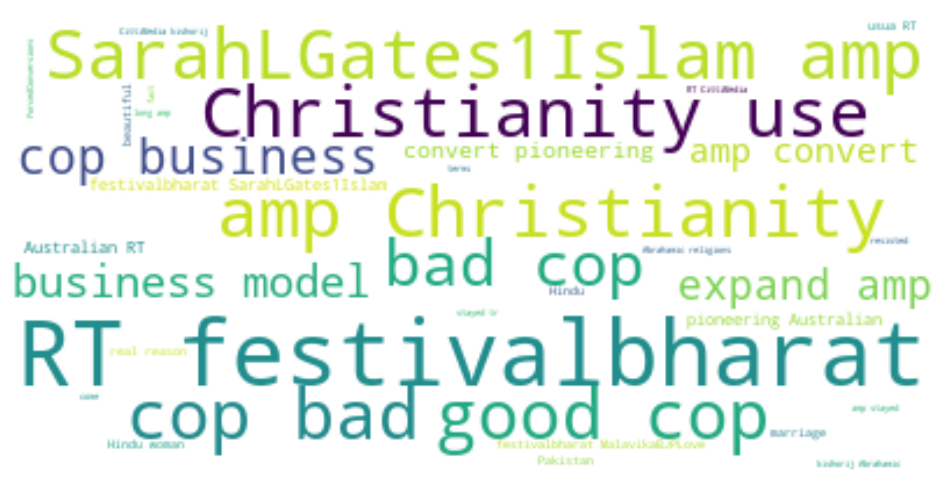

In [42]:
corpus = ' '.join(tweet_dataset.text)
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["T", "J", "D", "S", "M", "H", "et al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h3>Analysis:</h3>
For this question, I have used the hash tag "ForcedConversion" and analysed the tweets. The word cloud displays some of the keywords present in the tweets. The keywords are forced conversion, hindu, muslim, pakistan, and all. The more the size of the word, the more it is important. From this, a person can easily analyze that the tweets are written on forced conversion in Pakistan. 

The tweets highlights that this injustice is done mostly on Hindus and Christians. The tweets also highlights that this is done in the rural areas of Pakistan and not in the urban areas. The tweets also highlights that this is done by the people who are in power and the government is not taking any action against this.

The tweeets have word girl and marry in it which means that always girl gets converted and then gets married to a person whom she never has ever met. 